#Import data and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm_notebook
from itertools import product

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/SriniRaghav007/Genomes-and-Gentic-disorder-in-children/main/Assignment/train.csv?token=AM7YPLTRCUGVHVDSBTA2QELBRYFR2 -O train.csv
!wget https://raw.githubusercontent.com/SriniRaghav007/Genomes-and-Gentic-disorder-in-children/main/Assignment/test.csv?token=AM7YPLQCVHPAGY6TMTA5U7LBRYFVK -O test.csv

--2021-11-05 08:30:29--  https://raw.githubusercontent.com/SriniRaghav007/Genomes-and-Gentic-disorder-in-children/main/Assignment/train.csv?token=AM7YPLTRCUGVHVDSBTA2QELBRYFR2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103819 (101K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 101.39K  --.-KB/s    in 0.02s   

2021-11-05 08:30:29 (5.84 MB/s) - ‘train.csv’ saved [103819/103819]

--2021-11-05 08:30:30--  https://raw.githubusercontent.com/SriniRaghav007/Genomes-and-Gentic-disorder-in-children/main/Assignment/test.csv?token=AM7YPLQCVHPAGY6TMTA5U7LBRYFVK
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.g

In [3]:
data = pd.read_csv(r"train.csv")
data.head()

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


In [4]:
data.shape

(1500, 6)

In [5]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

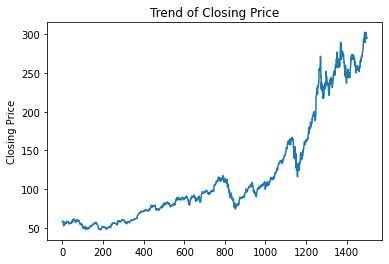

In [6]:
plt.plot(data['Close'])
plt.title("Trend of Closing Price")
plt.ylabel("Closing Price")
plt.show()

Multiplicative Model

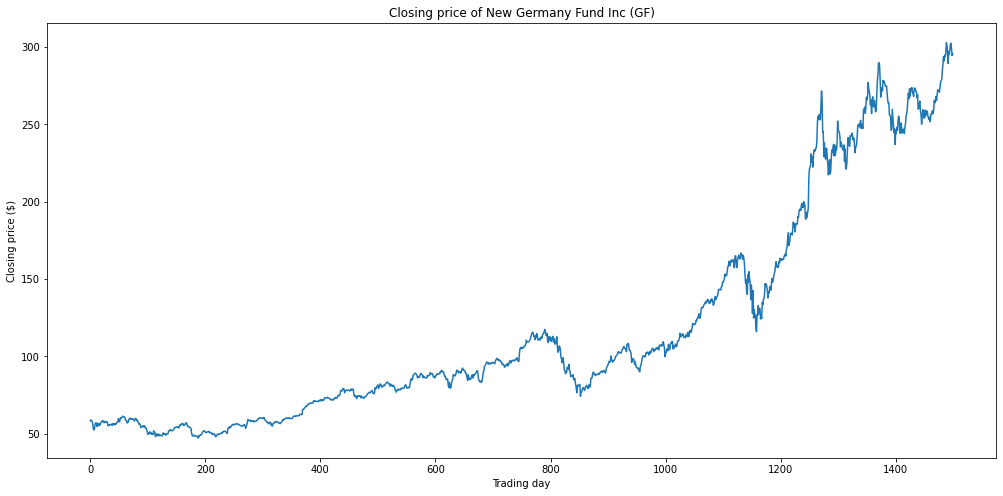

In [7]:
plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

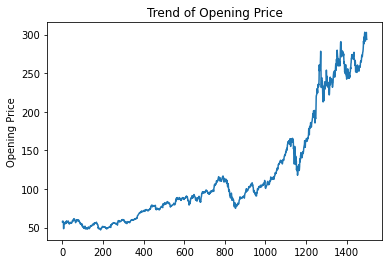

In [8]:
plt.plot(data['Open'])
plt.title("Trend of Opening Price")
plt.ylabel("Opening Price")
plt.show()

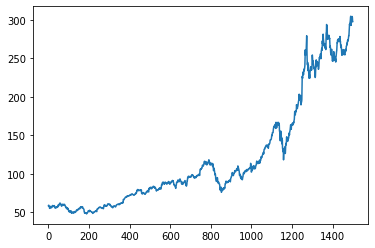

In [9]:
plt.plot(data['High'])
plt.show()

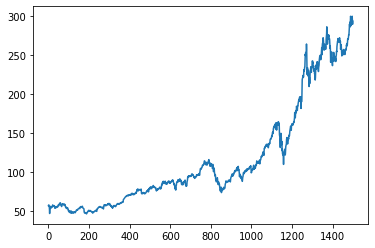

In [10]:
plt.plot(data['Low'])
plt.show()

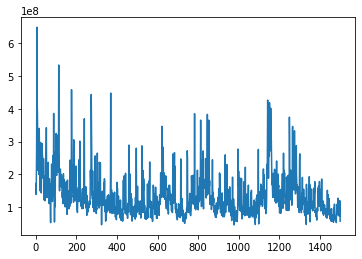

In [11]:
plt.plot(data['Volume'])
plt.show()

In [12]:
len(pd.value_counts(data['Volume']))

1495

[]

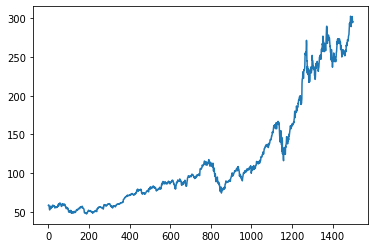

In [13]:
plt.plot(data['Close'])
plt.plot()    #two plots TODO

#Moving Average

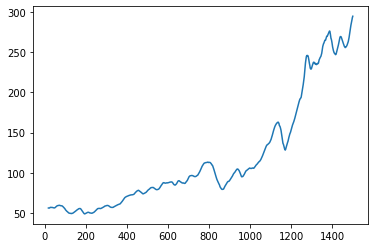

In [14]:
data['Close'].rolling(window =20).mean().plot()

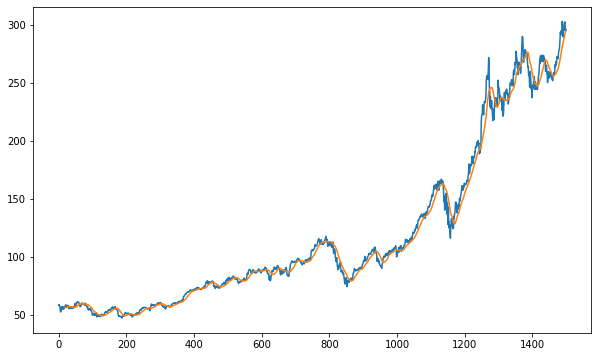

In [15]:
data['Close'].plot(figsize=(10,6))
data['Close'].rolling(window =20).mean().plot()

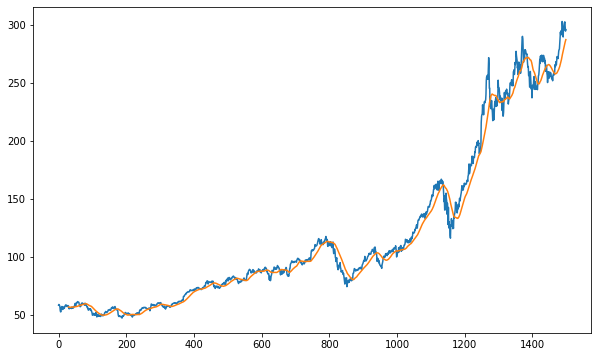

In [16]:
data['Close'].plot(figsize=(10,6))
data['Close'].rolling(window =30).mean().plot()

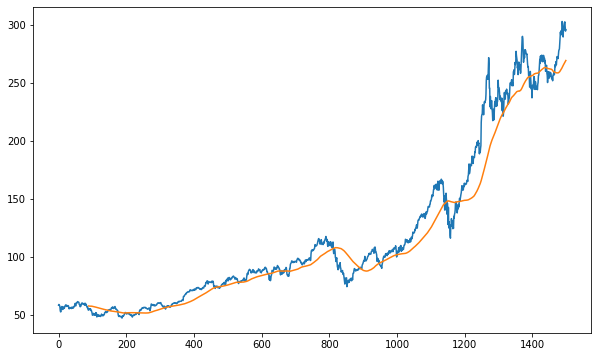

In [17]:
data['Close'].plot(figsize=(10,6))
data['Close'].rolling(window =90).mean().plot()

#Exponential Smoothing

In [18]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.title("Exponential Smoothing")
    plt.grid(True);

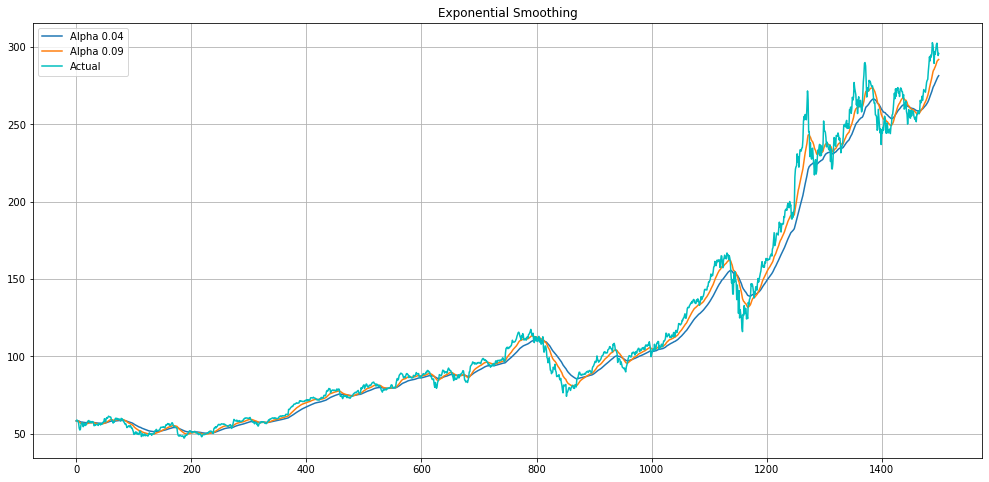

In [19]:
plot_exponential_smoothing(data.Close, [0.04, 0.09])

Alpha 0.04 smoothed the curve better

#Double Exponential Smoothing

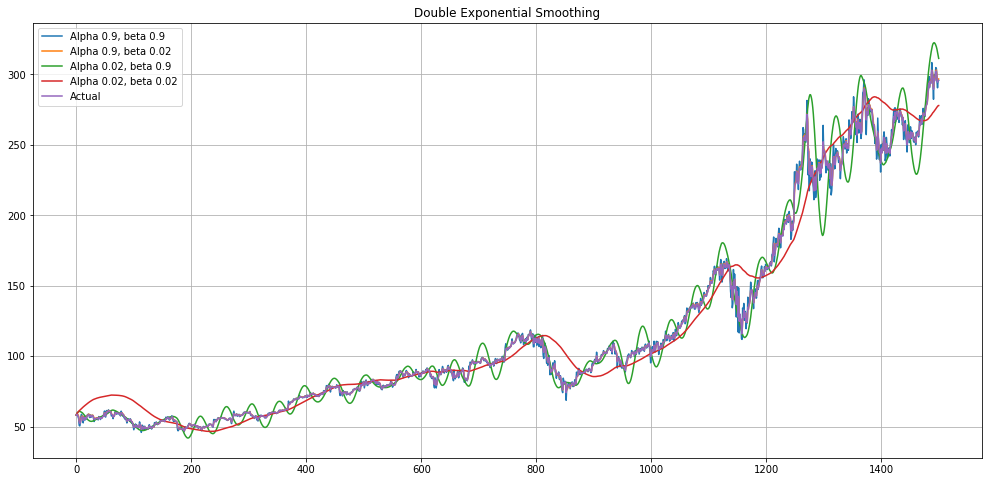

In [20]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

Prolly green line

#Checking Autocorrelation

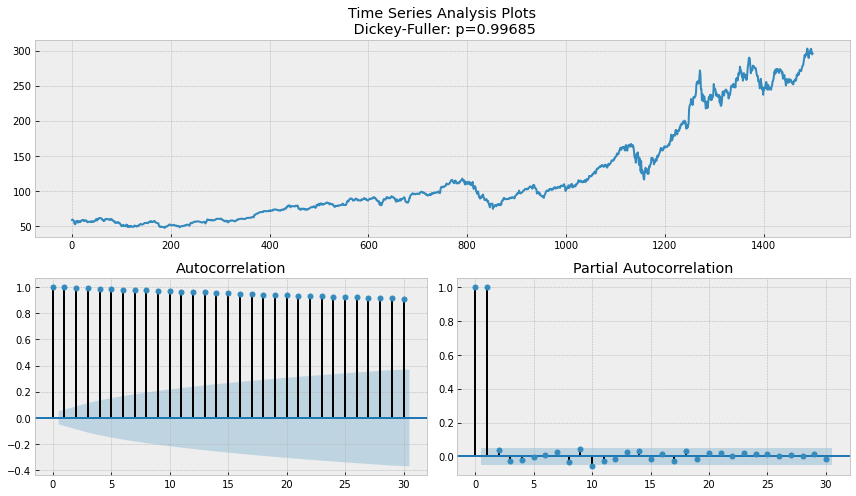

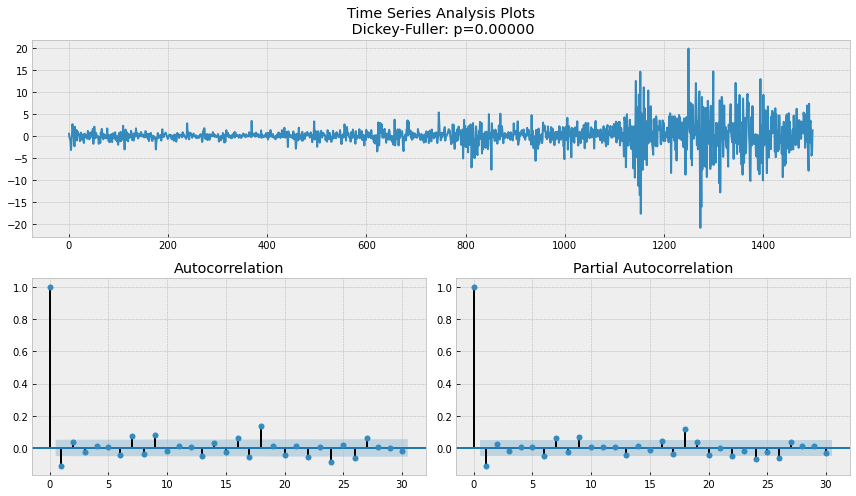

In [21]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data.Close - data.Close.shift(1)

tsplot(data_diff[1:], lags=30)

#Model

In [22]:
data['Date'].dtype
data['Date']=pd.to_datetime(data['Date'])
#print(data['Date'].apply(lambda x: x.year))

In [23]:
def to_integer(dt_time):
    return 10000*dt_time.apply(lambda x: x.year) + 100*dt_time.apply(lambda x: x.month) + dt_time.apply(lambda x: x.day)


In [24]:
data['Date']=to_integer(data['Date'])

In [25]:
'''from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaler1 = scaler.fit_transform(data)'''

'from numpy import asarray\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n# transform data\nscaler1 = scaler.fit_transform(data)'

In [26]:
#scaled_features_df = pd.DataFrame(scaler1, index=data.index, columns=data.columns)

In [27]:
data

,Date,Open,High,Low,Volume,Close
0,20150814,57.484790,58.398406,57.342469,171718000,58.237720
1,20150817,58.274453,59.013611,58.026536,163538800,58.788651
2,20150818,58.453501,58.917197,58.260678,138242800,58.485638
3,20150819,58.301997,58.494820,57.650069,193146000,57.801575
4,20150820,57.374601,57.498558,56.249794,274006400,56.718082
...,...,...,...,...,...,...
1495,20210723,299.658540,301.995035,298.400415,71447400,301.675507
1496,20210726,301.096392,304.211720,299.958083,72434100,302.534241
1497,20210727,302.793811,302.973565,295.664509,104818600,298.100861
1498,20210728,294.186727,298.500271,289.653510,118931200,294.526215


In [28]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler

In [29]:
features = ["Date", "Open", "High", "Low","Volume"]
autoscaler = StandardScaler()
data[features] = autoscaler.fit_transform(data[features])

In [30]:
data

,Date,Open,High,Low,Volume,Close
0,-1.749681,-0.869149,-0.862761,-0.866025,0.575814,58.237720
1,-1.749511,-0.857800,-0.854029,-0.856056,0.449438,58.788651
2,-1.749454,-0.855227,-0.855398,-0.852644,0.058591,58.485638
3,-1.749397,-0.857405,-0.861392,-0.861542,0.906896,57.801575
4,-1.749340,-0.870732,-0.875532,-0.881949,2.156264,56.718082
...,...,...,...,...,...,...
1495,1.651469,2.611221,2.594479,2.647044,-0.973459,301.675507
1496,1.651639,2.631885,2.625939,2.669744,-0.958214,302.534241
1497,1.651696,2.656280,2.608367,2.607172,-0.457843,298.100861
1498,1.651753,2.532584,2.544880,2.519570,-0.239791,294.526215


In [31]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:

print(X)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)


[[-1.74968091 -0.86914894 -0.86276073 -0.86602521  0.57581399]
 [-1.7495106  -0.8578004  -0.85402945 -0.85605593  0.44943783]
 [-1.74945382 -0.85522723 -0.85539781 -0.85264366  0.05859136]
 ...
 [ 1.65169581  2.65627951  2.60836683  2.60717167 -0.45784327]
 [ 1.65175259  2.53258386  2.54487971  2.51957012 -0.23979062]
 [ 1.65180936  2.52913991  2.53297579  2.57894135 -1.20132763]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
import sklearn
from sklearn import linear_model

ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
logistic = linear_model.LogisticRegression(solver='liblinear')

In [34]:
y

array([ 58.23772049,  58.78865051,  58.48563766, ..., 298.1008606 ,
       294.5262146 , 295.8442383 ])

In [35]:
test_data=pd.read_csv('test.csv')

In [36]:
test_data.drop(labels=['Close'],axis=1,inplace=True)

In [37]:
df=pd.DataFrame(test_data, columns=['Date'])

In [38]:
test_data['Date'].dtype
test_data['Date']=pd.to_datetime(test_data['Date'])

In [39]:
test_data['Date']=to_integer(test_data['Date'])

In [40]:
'''scaler1 = scaler.fit_transform(test_data)
s1 = pd.DataFrame(scaler1, index=test_data.index, columns=test_data.columns)'''

'scaler1 = scaler.fit_transform(test_data)\ns1 = pd.DataFrame(scaler1, index=test_data.index, columns=test_data.columns)'

In [41]:
features = ["Date", "Open", "High", "Low","Volume"]
test_data[features] = autoscaler.transform(test_data[features])

In [42]:
test_data

,Date,Open,High,Low,Volume
0,1.651866,2.520243,2.526740,2.565262,-0.989920
1,1.622231,2.577069,2.544313,2.598441,-1.105833
2,1.627908,2.561283,2.575206,2.596403,-1.076374
3,1.633586,2.603186,2.568120,2.628417,-1.206445
4,1.639263,2.594862,2.569538,2.625216,-1.360500
5,1.644940,2.583075,2.555094,2.615850,-1.241996
6,1.661972,2.578763,2.543457,2.612644,-1.321703
7,1.667649,2.585661,2.572126,2.606232,-1.010917
8,1.673326,2.574452,2.544024,2.612935,-1.328118
9,1.679003,2.578476,2.610161,2.621971,-0.960554


In [43]:
lasso.fit(X, y)
y_pred=lasso.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1798.7298461655391, tolerance: 726.0802106802721
  positive)


In [44]:
print(y_pred)

[291.32229353 294.20304103 294.22671167 295.9715795  295.647643
 294.7991457  294.35305141 295.20182841 294.19552855 295.84898442
 299.7768975  299.98440338 302.76409555 301.07358418 293.59834587
 297.13869891 299.40186149 301.37997489 301.18161503 298.7128128
 297.34818933 302.36528157 306.69100013 308.44016067 309.48476482
 309.44650156 312.71503575 314.79819811 312.51447825 310.47895226]


In [45]:
df['Close']=y_pred

In [46]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [47]:
import csv
df.to_csv('submission.csv')